<a href="https://colab.research.google.com/github/GeorgiaAAAl/GeorgiaAAAl/blob/main/DISPERSAO_CORRELACAO_CALCULO_R.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
df = pd.read_excel('/content/drive/MyDrive/georgia/GEORGIA Peso e Idade.xlsx')
display(df)

,DATA,G1 Protocol,Prontuário,Idade,Peso,Categoria,PKA
0,2023-07-07,CARDIAC,17170622,0.070000,3.240,A,0.3400
1,2019-05-07,THORAX,15788953,0.083333,2.250,A,0.0323
2,2021-03-28,THORAX,16336737,0.083333,5.740,A,0.0146
3,2020-03-26,ORTHOPAEDICS,16088098,0.087600,3.545,A,0.0317
4,2022-07-04,THORAX,16792020,0.098600,4.080,A,0.0423
...,...,...,...,...,...,...,...
827,2018-06-15,THORAX,14302897,17.000000,78.000,E,0.5630
828,2020-10-15,THORAX,16147548,18.000000,50.400,E,0.0600
829,2020-01-07,VASCULAR HQ,9020157,18.000000,56.200,E,19.9000
830,2019-06-11,THORAX,8684706,18.000000,69.200,E,3.4800


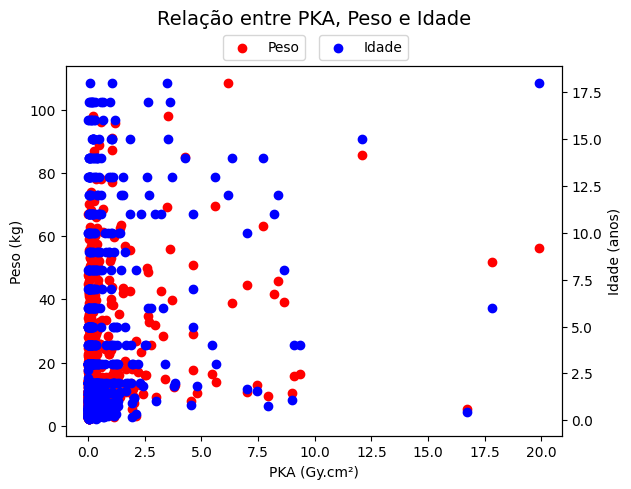

In [ ]:
figure, left_ax = plt.subplots()
left_ax.scatter(df['PKA'], df['Peso'], color='red', label='Peso')
left_ax.set_ylabel('Peso (kg)')
left_ax.set_xlabel('PKA (Gy.cm²)')


right_ax = left_ax.twinx()
right_ax.scatter(df['PKA'], df['Idade'], color='blue',label='Idade')
right_ax.set_ylabel('Idade (anos)')

plt.title('Relação entre PKA, Peso e Idade', pad=30, fontsize=14)

left_ax.legend(loc='center',bbox_to_anchor=(0.4, 1.05))
right_ax.legend(loc='center',bbox_to_anchor=(0.6, 1.05))
plt.show()

In [ ]:
from scipy import stats

df = df.dropna(subset=['Peso', 'PKA'])

df['Peso'] = pd.to_numeric(df['Peso'], errors='coerce')
df['PKA'] = pd.to_numeric(df['PKA'], errors='coerce')
df['Idade'] = pd.to_numeric(df['Idade'], errors='coerce')

print(df['Peso'].nunique()) #valores exclusivos e que não sejam nulos/vazios nem duplicados
print(df['Idade'].nunique())

x = df['Peso']
y = df['PKA']
z = df['Idade']

slope, intercept, r1, p, std_err = stats.linregress(x, y)

slope, intercept, r2, p, std_err = stats.linregress(x, z)

print('******* PESO *******')
if not (pd.isna(slope) or pd.isna(intercept)):
    print('R (coeficiente de correlação):', r1)  # Valor de R para peso
else:
    print('Erro na regressão: valores NaN detectados')
print("\n")
print('******* IDADE *******')
if not (pd.isna(slope) or pd.isna(intercept)):
    print('R (coeficiente de correlação):', r2)  # Valor de R para idade
else:
    print('Erro na regressão: valores NaN detectados')


598
86
******* PESO *******
R (coeficiente de correlação): 0.24015869859644723


******* IDADE *******
R (coeficiente de correlação): 0.8995363247359844


<ipython-input-5-cf51e587b320>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Peso'] = pd.to_numeric(df['Peso'], errors='coerce')
<ipython-input-5-cf51e587b320>:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['PKA'] = pd.to_numeric(df['PKA'], errors='coerce')
<ipython-input-5-cf51e587b320>:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata

calculo do fator r

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).
Verificando valores nulos no DataFrame:
DATA            0
G1 Protocol     0
Prontuário      0
Idade           0
Peso           16
Categoria       0
PKA             0
dtype: int64
Coeficiente de correlação entre PKA e Peso: 0.24
Coeficiente de correlação entre PKA e Idade: 0.20


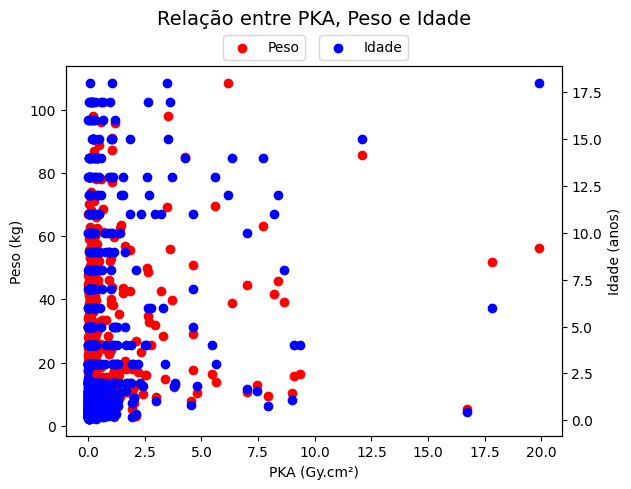

,DATA,G1 Protocol,Prontuário,Idade,Peso,Categoria,PKA
0,2023-07-07,CARDIAC,17170622,0.070000,3.240,A,0.3400
1,2019-05-07,THORAX,15788953,0.083333,2.250,A,0.0323
2,2021-03-28,THORAX,16336737,0.083333,5.740,A,0.0146
3,2020-03-26,ORTHOPAEDICS,16088098,0.087600,3.545,A,0.0317
4,2022-07-04,THORAX,16792020,0.098600,4.080,A,0.0423
...,...,...,...,...,...,...,...
827,2018-06-15,THORAX,14302897,17.000000,78.000,E,0.5630
828,2020-10-15,THORAX,16147548,18.000000,50.400,E,0.0600
829,2020-01-07,VASCULAR HQ,9020157,18.000000,56.200,E,19.9000
830,2019-06-11,THORAX,8684706,18.000000,69.200,E,3.4800


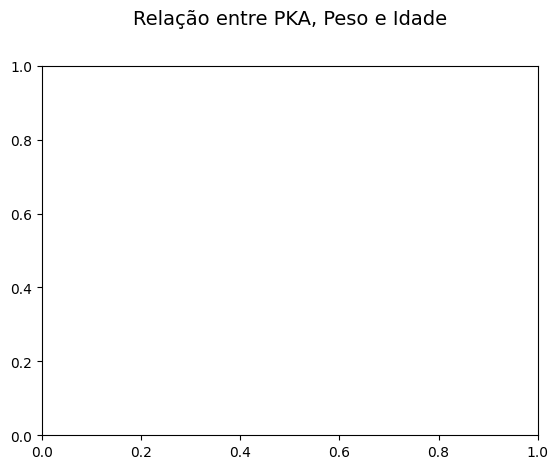

,DATA,G1 Protocol,Prontuário,Idade,Peso,Categoria,PKA
0,2023-07-07,CARDIAC,17170622,0.070000,3.240,A,0.3400
1,2019-05-07,THORAX,15788953,0.083333,2.250,A,0.0323
2,2021-03-28,THORAX,16336737,0.083333,5.740,A,0.0146
3,2020-03-26,ORTHOPAEDICS,16088098,0.087600,3.545,A,0.0317
4,2022-07-04,THORAX,16792020,0.098600,4.080,A,0.0423
...,...,...,...,...,...,...,...
827,2018-06-15,THORAX,14302897,17.000000,78.000,E,0.5630
828,2020-10-15,THORAX,16147548,18.000000,50.400,E,0.0600
829,2020-01-07,VASCULAR HQ,9020157,18.000000,56.200,E,19.9000
830,2019-06-11,THORAX,8684706,18.000000,69.200,E,3.4800


In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from scipy.stats import pearsonr  # Para calcular a correlação
from google.colab import drive

# Montar o Google Drive
drive.mount('/content/drive')

# Carregar o arquivo Excel
df = pd.read_excel('/content/drive/MyDrive/georgia/GEORGIA Peso e Idade.xlsx')

# Verificar se existem valores nulos
print("Verificando valores nulos no DataFrame:")
print(df.isnull().sum())

# Remover linhas com valores nulos (se existirem)
df = df.dropna(subset=['PKA', 'Peso', 'Idade'])

# Garantir que os dados sejam numéricos
df['PKA'] = pd.to_numeric(df['PKA'], errors='coerce')
df['Peso'] = pd.to_numeric(df['Peso'], errors='coerce')
df['Idade'] = pd.to_numeric(df['Idade'], errors='coerce')

# Cálculo da correlação entre PKA e Peso
correlacao_peso_pka, _ = pearsonr(df['PKA'], df['Peso'])

# Cálculo da correlação entre PKA e Idade
correlacao_idade_pka, _ = pearsonr(df['PKA'], df['Idade'])

# Exibir os coeficientes de correlação
print(f"Coeficiente de correlação entre PKA e Peso: {correlacao_peso_pka:.2f}")
print(f"Coeficiente de correlação entre PKA e Idade: {correlacao_idade_pka:.2f}")

# Criar o gráfico com dois eixos y
figure, left_ax = plt.subplots()

# Scatter plot para Peso vs PKA
left_ax.scatter(df['PKA'], df['Peso'], color='red', label='Peso')
left_ax.set_ylabel('Peso (kg)')
left_ax.set_xlabel('PKA (Gy.cm²)')

# Scatter plot para Idade vs PKA
right_ax = left_ax.twinx()
right_ax.scatter(df['PKA'], df['Idade'], color='blue', label='Idade')
right_ax.set_ylabel('Idade (anos)')

# Adicionar título e legendas
plt.title('Relação entre PKA, Peso e Idade', pad=30, fontsize=14)
left_ax.legend(loc='center', bbox_to_anchor=(0.4, 1.05))
right_ax.legend(loc='center', bbox_to_anchor=(0.6, 1.05))

# Mostrar o gráfico
plt.show()

# Exibir os primeiros dados para conferência (opcional)
display(df)

# Adicionar título e legendas
plt.title('Relação entre PKA, Peso e Idade', pad=30, fontsize=14)
left_ax.legend(loc='center', bbox_to_anchor=(0.4, 1.05))
right_ax.legend(loc='center', bbox_to_anchor=(0.6, 1.05))

# Mostrar o gráfico
plt.show()

# Exibir os primeiros dados para conferência (opcional)
display(df)


OUTRA FORMA

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from scipy.stats import pearsonr  # Para calcular a correlação
from google.colab import drive

# Montar o Google Drive
drive.mount('/content/drive')

# Carregar o arquivo Excel
df = pd.read_excel('/content/drive/MyDrive/georgia/GEORGIA Peso e Idade.xlsx')


Mounted at /content/drive


Verificando valores nulos no DataFrame:
DATA           0
G1 Protocol    0
Prontuário     0
Idade          0
Peso           0
Categoria      0
PKA            0
dtype: int64


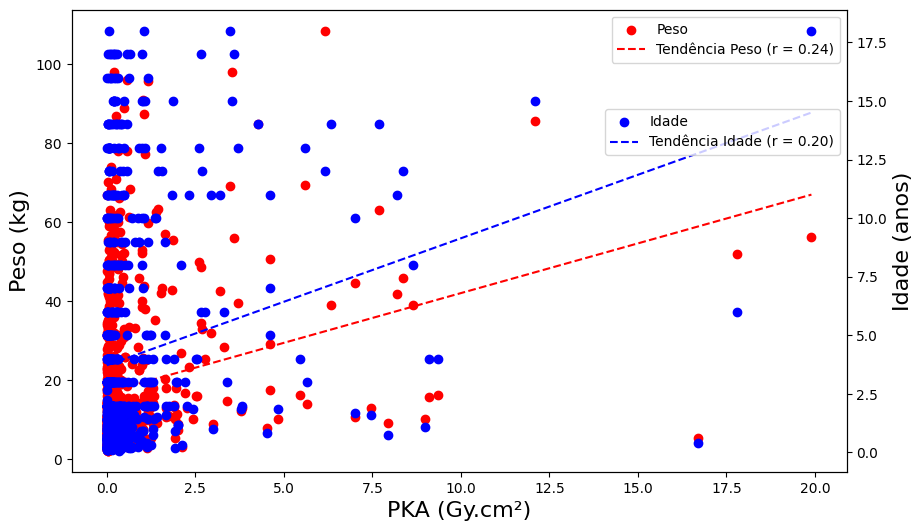

Coeficiente de correlação entre PKA e Peso: 0.24
Coeficiente de correlação entre PKA e Idade: 0.20


,DATA,G1 Protocol,Prontuário,Idade,Peso,Categoria,PKA
0,2023-07-07,CARDIAC,17170622,0.070000,3.240,A,0.3400
1,2019-05-07,THORAX,15788953,0.083333,2.250,A,0.0323
2,2021-03-28,THORAX,16336737,0.083333,5.740,A,0.0146
3,2020-03-26,ORTHOPAEDICS,16088098,0.087600,3.545,A,0.0317
4,2022-07-04,THORAX,16792020,0.098600,4.080,A,0.0423
...,...,...,...,...,...,...,...
827,2018-06-15,THORAX,14302897,17.000000,78.000,E,0.5630
828,2020-10-15,THORAX,16147548,18.000000,50.400,E,0.0600
829,2020-01-07,VASCULAR HQ,9020157,18.000000,56.200,E,19.9000
830,2019-06-11,THORAX,8684706,18.000000,69.200,E,3.4800


In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from scipy.stats import pearsonr, linregress  # Import linregress here
from google.colab import drive







# Verificar se existem valores nulos
print("Verificando valores nulos no DataFrame:")
print(df.isnull().sum())

# Remover linhas com valores nulos (se existirem)
df = df.dropna(subset=['PKA', 'Peso', 'Idade'])

# Garantir que os dados sejam numéricos
df['PKA'] = pd.to_numeric(df['PKA'], errors='coerce')
df['Peso'] = pd.to_numeric(df['Peso'], errors='coerce')
df['Idade'] = pd.to_numeric(df['Idade'], errors='coerce')

# Calcular o coeficiente de correlação (r) para Peso e PKA
correlacao_peso_pka, _ = pearsonr(df['PKA'], df['Peso'])

# Calcular o coeficiente de correlação (r) para Idade e PKA
correlacao_idade_pka, _ = pearsonr(df['PKA'], df['Idade'])

# Calcular a regressão linear (linha de tendência) para Peso vs PKA
slope_peso, intercept_peso, _, _, _ = linregress(df['PKA'], df['Peso'])

# Calcular a regressão linear (linha de tendência) para Idade vs PKA
slope_idade, intercept_idade, _, _, _ = linregress(df['PKA'], df['Idade'])

# Criar o gráfico com dois eixos y
figure, left_ax = plt.subplots(figsize=(10, 6))

# Scatter plot para Peso vs PKA
left_ax.scatter(df['PKA'], df['Peso'], color='red', label='Peso')
left_ax.set_ylabel('Peso (kg)')
left_ax.set_xlabel('PKA (Gy.cm²)')

# Adicionar linha de tendência para Peso vs PKA
x_vals = np.linspace(df['PKA'].min(), df['PKA'].max(), 100)
left_ax.plot(x_vals, slope_peso * x_vals + intercept_peso, color='red', linestyle='--', label=f'Tendência Peso (r = {correlacao_peso_pka:.2f})')

# Scatter plot para Idade vs PKA
right_ax = left_ax.twinx()
right_ax.scatter(df['PKA'], df['Idade'], color='blue', label='Idade',)
right_ax.set_ylabel('Idade (anos)')

# Adicionar linha de tendência para Idade vs PKA
right_ax.plot(x_vals, slope_idade * x_vals + intercept_idade, color='blue', linestyle='--', label=f'Tendência Idade (r = {correlacao_idade_pka:.2f})')

# Adicionar título e legendas
#plt.title('Relação entre PKA, Peso e Idade com Linhas de Tendência e Correlação', pad=30, fontsize=17)
#left_ax.legend(loc='upper left')
#right_ax.legend(loc='upper right')

# Ajustar as legendas com tamanho de fonte = 18
left_ax.legend(loc='upper right', bbox_to_anchor=(1, 1), fontsize=20)
right_ax.legend(loc='upper right', bbox_to_anchor=(1, 0.8), fontsize=20)



left_ax.legend(loc='upper right', bbox_to_anchor=(1, 1))
right_ax.legend(loc='upper right', bbox_to_anchor=(1, 0.8))



# Ajustar o tamanho da fonte dos rótulos dos eixos
left_ax.set_xlabel('PKA (Gy.cm²)', fontsize=16)  # Increased x-axis label font size
left_ax.set_ylabel('Peso (kg)', fontsize=16)  # Increased left y-axis label font size
right_ax.set_ylabel('Idade (anos)', fontsize=16)  # Increased right y-axis label font size


# Mostrar o gráfico
plt.show()

# Exibir os coeficientes no console
print(f"Coeficiente de correlação entre PKA e Peso: {correlacao_peso_pka:.2f}")
print(f"Coeficiente de correlação entre PKA e Idade: {correlacao_idade_pka:.2f}")

# Exibir os primeiros dados para conferência (opcional)
display(df)

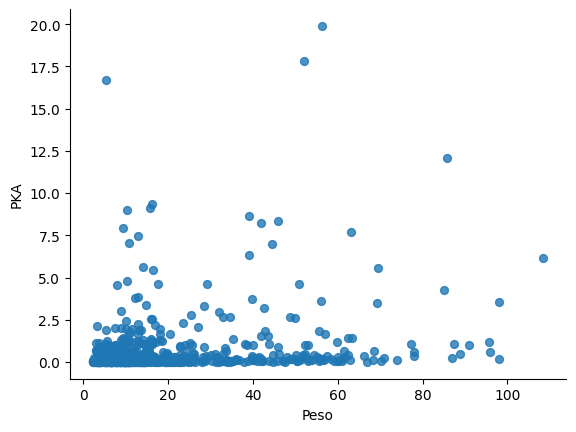

In [ ]:
from matplotlib import pyplot as plt
df.plot(kind='scatter', x='Peso', y='PKA', s=32, alpha=.8)
plt.gca().spines[['top', 'right',]].set_visible(False)

AJUSTE NO CODIGO DE TENDENCIA FONTE...

Verificando valores nulos no DataFrame:
DATA           0
G1 Protocol    0
Prontuário     0
Idade          0
Peso           0
Categoria      0
PKA            0
dtype: int64


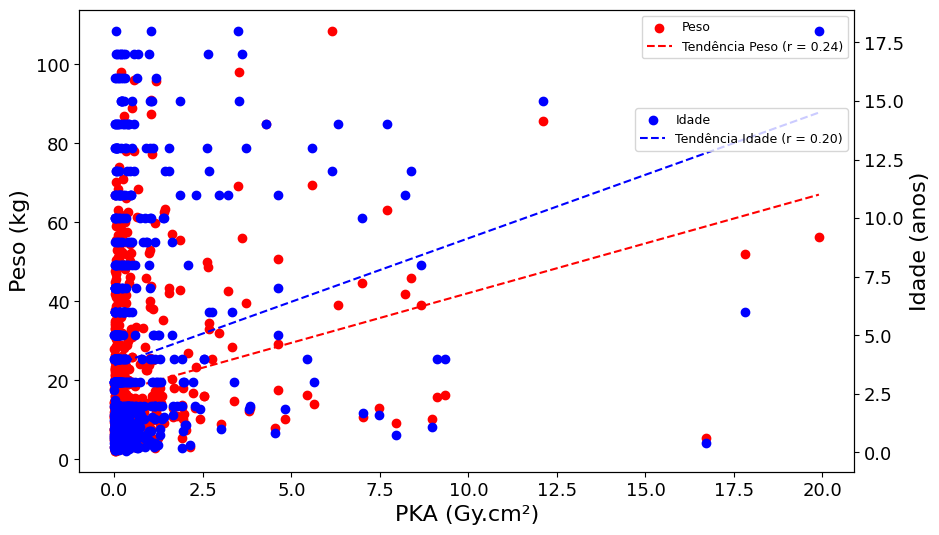

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from scipy.stats import pearsonr, linregress  # Import linregress here
from google.colab import drive







# Verificar se existem valores nulos
print("Verificando valores nulos no DataFrame:")
print(df.isnull().sum())

# Remover linhas com valores nulos (se existirem)
df = df.dropna(subset=['PKA', 'Peso', 'Idade'])

# Garantir que os dados sejam numéricos
df['PKA'] = pd.to_numeric(df['PKA'], errors='coerce')
df['Peso'] = pd.to_numeric(df['Peso'], errors='coerce')
df['Idade'] = pd.to_numeric(df['Idade'], errors='coerce')

# Calcular o coeficiente de correlação (r) para Peso e PKA
correlacao_peso_pka, _ = pearsonr(df['PKA'], df['Peso'])

# Calcular o coeficiente de correlação (r) para Idade e PKA
correlacao_idade_pka, _ = pearsonr(df['PKA'], df['Idade'])

# Calcular a regressão linear (linha de tendência) para Peso vs PKA
slope_peso, intercept_peso, _, _, _ = linregress(df['PKA'], df['Peso'])

# Calcular a regressão linear (linha de tendência) para Idade vs PKA
slope_idade, intercept_idade, _, _, _ = linregress(df['PKA'], df['Idade'])

# Criar o gráfico com dois eixos y
figure, left_ax = plt.subplots(figsize=(10, 6))

# Scatter plot para Peso vs PKA
left_ax.scatter(df['PKA'], df['Peso'], color='red', label='Peso')
left_ax.set_ylabel('Peso (kg)')
left_ax.set_xlabel('PKA (Gy.cm²)')

# Adicionar linha de tendência para Peso vs PKA
x_vals = np.linspace(df['PKA'].min(), df['PKA'].max(), 100)
left_ax.plot(x_vals, slope_peso * x_vals + intercept_peso, color='red', linestyle='--', label=f'Tendência Peso (r = {correlacao_peso_pka:.2f})')

# Scatter plot para Idade vs PKA
right_ax = left_ax.twinx()
right_ax.scatter(df['PKA'], df['Idade'], color='blue', label='Idade',)
right_ax.set_ylabel('Idade (anos)')

# Adicionar linha de tendência para Idade vs PKA
right_ax.plot(x_vals, slope_idade * x_vals + intercept_idade, color='blue', linestyle='--', label=f'Tendência Idade (r = {correlacao_idade_pka:.2f})')





























































# Ajustar as legendas com tamanho de fonte maior
left_ax.legend(loc='upper right', bbox_to_anchor=(1, 1), fontsize=9)  # Fonte da legenda do eixo esquerdo
right_ax.legend(loc='upper right', bbox_to_anchor=(1, 0.8), fontsize=9)  # Fonte da legenda do eixo direito

# Ajustar o tamanho da fonte dos rótulos dos eixos
left_ax.set_xlabel('PKA (Gy.cm²)', fontsize=16)  # Fonte maior para o rótulo do eixo x
left_ax.set_ylabel('Peso (kg)', fontsize=16)  # Fonte maior para o rótulo do eixo y esquerdo
right_ax.set_ylabel('Idade (anos)', fontsize=16)  # Fonte maior para o rótulo do eixo y direito

# Ajustar o tamanho da fonte dos valores nos eixos
left_ax.tick_params(axis='both', which='major', labelsize=13)  # Fonte maior para os valores do eixo x e y esquerdo
right_ax.tick_params(axis='y', labelsize=13)  # Fonte maior para os valores do eixo y direito

# Mostrar o gráfico
plt.show()


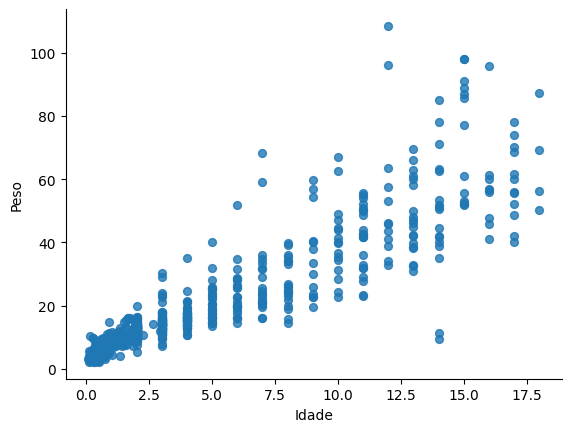

In [ ]:
from matplotlib import pyplot as plt
df.plot(kind='scatter', x='Idade', y='Peso', s=32, alpha=.8)
plt.gca().spines[['top', 'right',]].set_visible(False)

In [ ]:
# Adicionar título e ajustar legendas para o lado esquerdo
plt.title('Relação entre PKA, Peso e Idade com Linhas de Tendência e Correlação', pad=30, fontsize=14)
left_ax.legend(loc='upper left', bbox_to_anchor=(0, 1))
right_ax.legend(loc='upper left', bbox_to_anchor=(0, 0.8))
